# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    time.sleep(1)        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as error:
        print("City not found. Skipping...", error)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zeya
Processing Record 2 of Set 1 | puerto baquerizo moreno
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | paradip garh
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | balkanabat
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | severo-yeniseyskiy
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | kayangel
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | hawaiian paradise park
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zeya,53.7500,127.2667,283.98,46,7,1.15,RU,1714872959
1,puerto baquerizo moreno,-0.9000,-89.6000,296.75,90,88,3.78,EC,1714872961
2,grytviken,-54.2811,-36.5092,273.88,80,56,4.88,GS,1714872963
3,paradip garh,20.3167,86.6167,303.83,75,89,7.06,IN,1714872965
4,enewetak,11.3474,162.3373,300.83,78,36,7.24,MH,1714872966


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zeya,53.7500,127.2667,283.98,46,7,1.15,RU,1714872959
1,puerto baquerizo moreno,-0.9000,-89.6000,296.75,90,88,3.78,EC,1714872961
2,grytviken,-54.2811,-36.5092,273.88,80,56,4.88,GS,1714872963
3,paradip garh,20.3167,86.6167,303.83,75,89,7.06,IN,1714872965
4,enewetak,11.3474,162.3373,300.83,78,36,7.24,MH,1714872966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

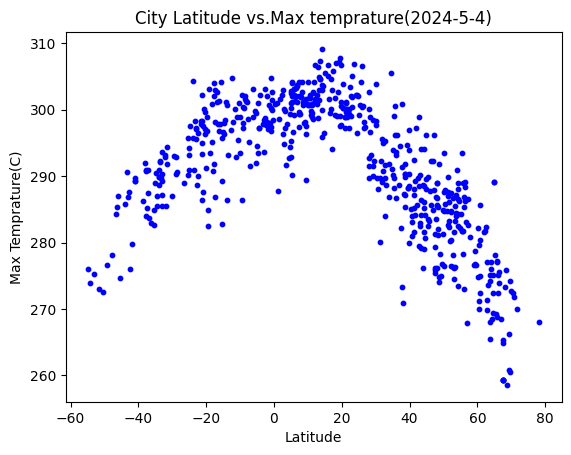

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp" , s = 10, c = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs.Max temprature(2024-5-4)")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

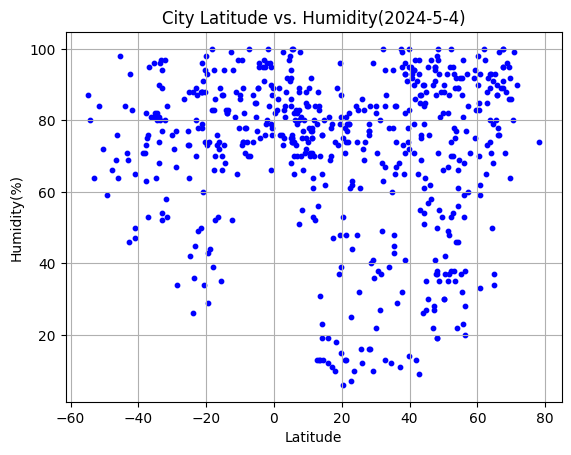

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity" , s = 10, c = "blue" )

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2024-5-4)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

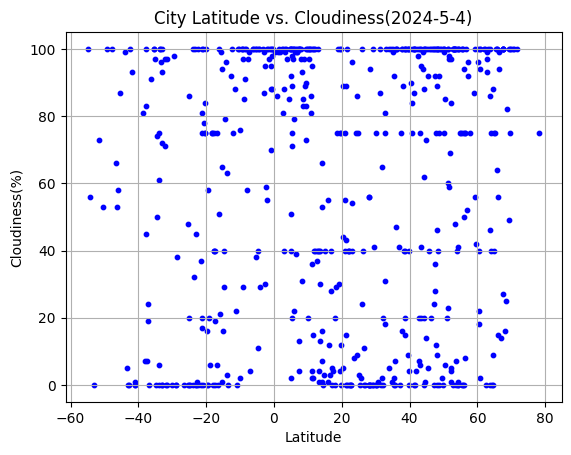

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness" , s = 10, c = "blue" )

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2024-5-4)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

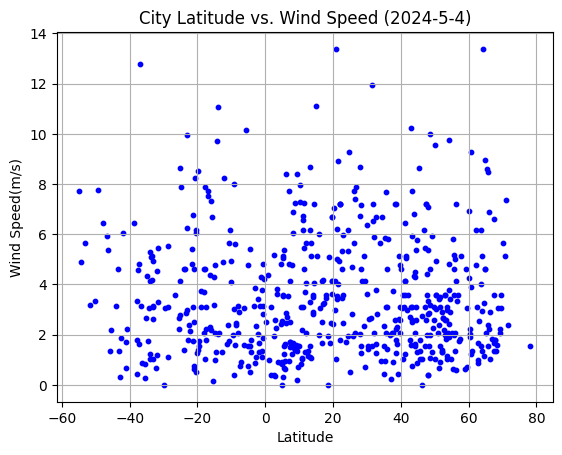

In [16]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed" , s = 10, c = "blue" )

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-5-4)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(df, x_column, y_column, x_label, y_label, x_pos, y_pos):
    x_values = df[x_column]
    y_values = df[y_column]
    linear_regression = linregress(x_values, y_values)
    print(f"The r-value is: {linear_regression.rvalue**2}")
    
    linregressValues = x_values * linear_regression.slope + linear_regression.intercept
    line_annotation = f"y = {linear_regression.slope:.2f}x + {linear_regression.intercept:.2f}"
    print(line_annotation)
    
    plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", s=50)
    plt.plot(x_values, linregressValues, "r-")
    plt.annotate(line_annotation, (x_pos,y_pos),fontsize=16, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zeya,53.7500,127.2667,283.98,46,7,1.15,RU,1714872959
3,paradip garh,20.3167,86.6167,303.83,75,89,7.06,IN,1714872965
4,enewetak,11.3474,162.3373,300.83,78,36,7.24,MH,1714872966
8,balkanabat,39.5108,54.3671,288.23,78,9,2.61,TM,1714872972
11,severo-yeniseyskiy,60.3725,93.0408,271.25,83,22,2.24,RU,1714872977


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto baquerizo moreno,-0.9000,-89.6000,296.75,90,88,3.78,EC,1714872961
2,grytviken,-54.2811,-36.5092,273.88,80,56,4.88,GS,1714872963
5,chonchi,-42.6128,-73.8092,275.99,93,100,1.86,CL,1714872968
6,adamstown,-25.0660,-130.1015,294.21,64,86,8.64,PN,1714872969
7,ushuaia,-54.8000,-68.3000,275.96,87,100,7.72,AR,1714872971


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7353925247730493
y = -0.48x + 306.90


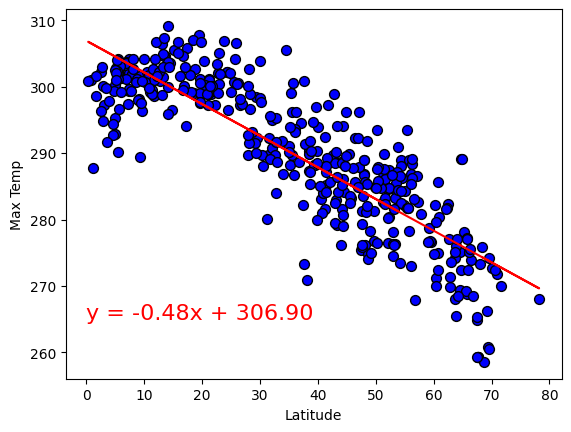

In [72]:
# Linear regression on Northern Hemisphere
createLinearRegressionPlot(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp", 0, 265)

The r-value is: 0.5898068084960764
y = 0.39x + 301.97


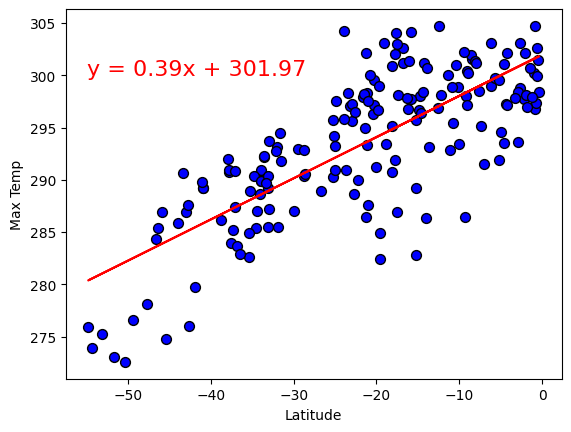

In [73]:
# Linear regression on Southern Hemisphere
createLinearRegressionPlot(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp", -55, 300)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


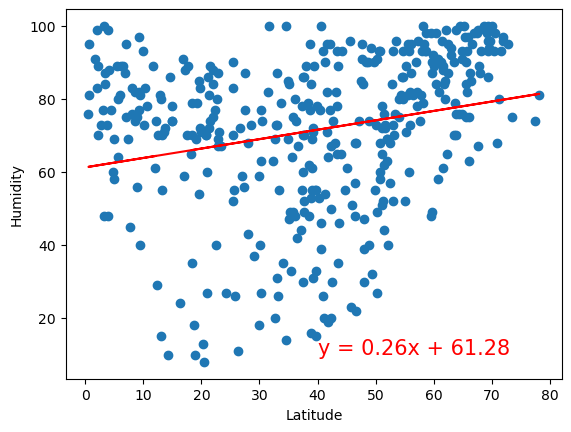

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


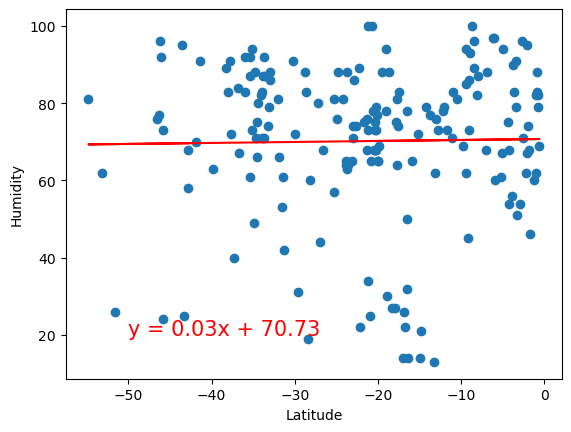

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


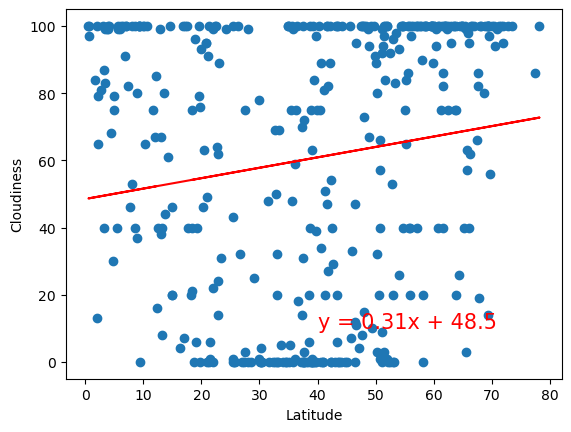

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


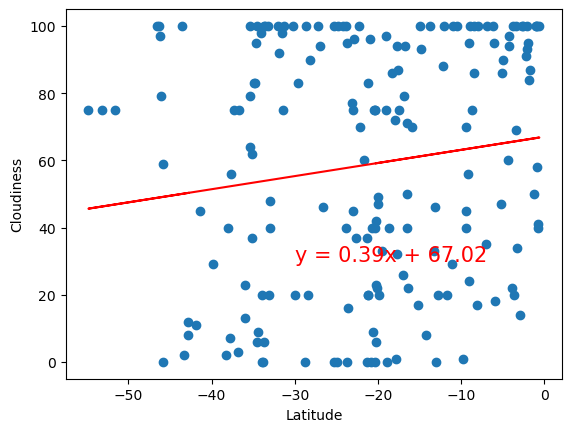

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


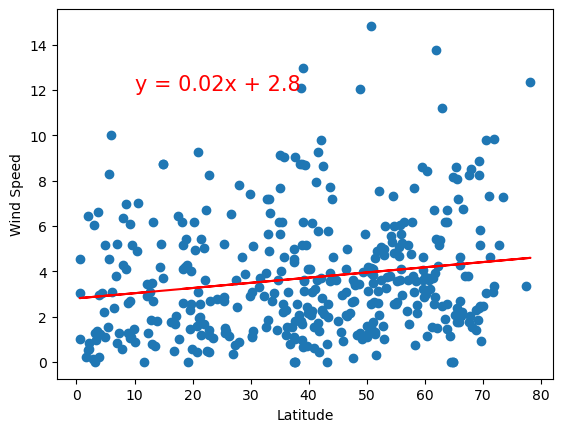

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


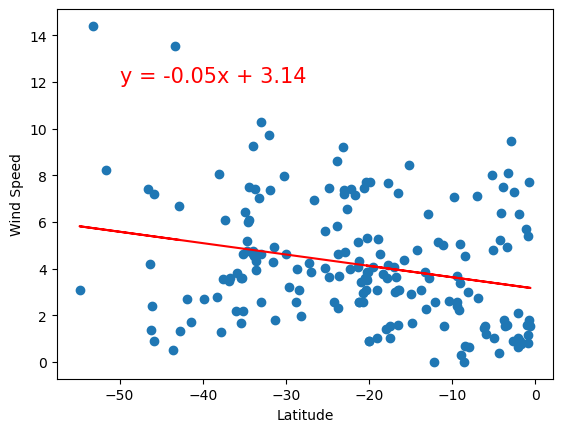

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE